## net_sim.ipynb

This notebook is used to run simulations using the ei_network class.

By Sergio Verduzco
January 2018

In [1]:
%cd ..
#import ei_network
from ei_network import *

/home/z/projects/draculab


In [2]:
# Create network
layers = ['S', 'M']
ei_net = ei_network(layers)

In [3]:
# Configure layer parameters
M = ei_net.layers['M']
S = ei_net.get_layer('S')
M.set_param('e_geom', 'center', [-1., 0.])
M.set_param('i_geom', 'center', [-1., 0.])
M.set_param('x_geom', 'center', [-1., 0.])
M.set_param('x_geom', 'rows', 0)  # no input units at layer M
M.set_param('x_geom', 'columns', 0)  # no input units at layer M
S.set_param('e_geom', 'center', [1., 0.])
S.set_param('i_geom', 'center', [1., 0.])
S.set_param('x_geom', 'center', [1., 0.])
S.set_param('x_geom', 'rows', 4)  
S.set_param('x_geom', 'columns', 4)  


In [4]:
# Add interlayer connections
ei_net.add_connection(('M','e'), ('S','i'))

In [5]:
# Configure interlayer connections
ei_net.set_param('Me_Si_syn', 'type', synapse_types.bcm)
ei_net.set_param('Me_Si_conn', 'edge_wrap', False)

In [6]:
ei_net.build()

Building layer S
Building layer M
Creating Me_Si connection


In [7]:
ei_net.run(5, 1.)

Starting presentation 0
Presentation 0 took 96.145094871521 seconds 
Starting presentation 1
Presentation 1 took 75.431964635849 seconds 
Starting presentation 2
Presentation 2 took 75.30322670936584 seconds 
Starting presentation 3
Presentation 3 took 74.35938787460327 seconds 
Starting presentation 4
Presentation 4 took 75.1359453201294 seconds 
Total execution time is 396.3813326358795 seconds 
----------------------


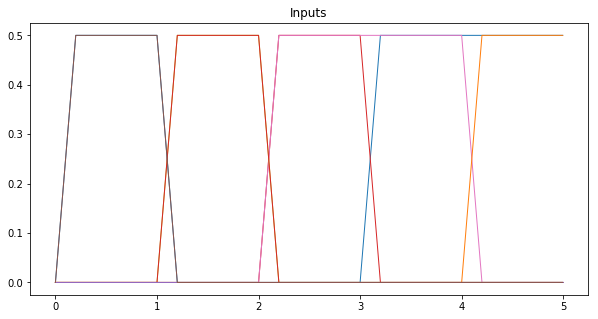

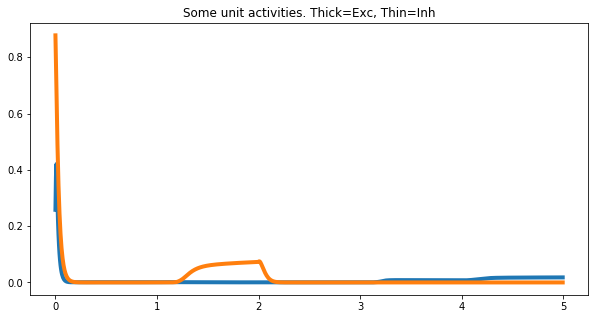

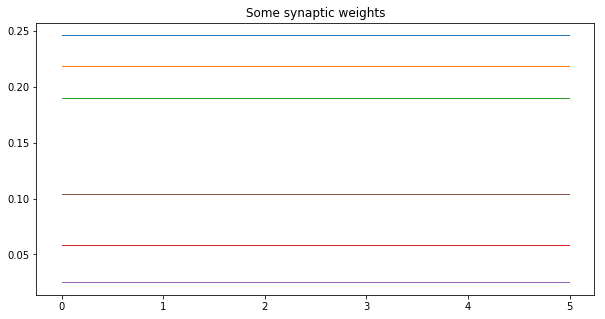

In [8]:
%matplotlib inline
ei_net.basic_plot('S')

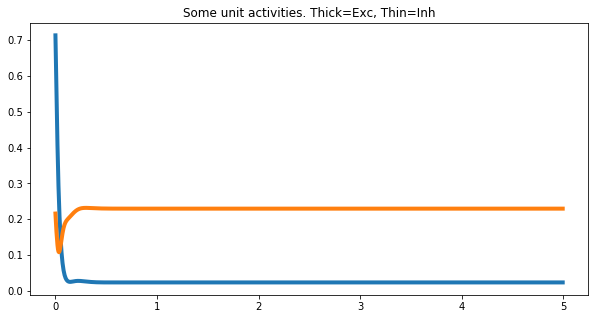

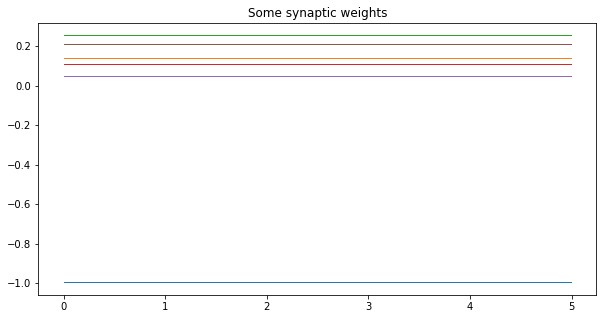

In [9]:
ei_net.basic_plot('M')

In [11]:
ei_net.double_anim(M.e+S.e+S.x, thr=0.45)

[167 225 242 227]


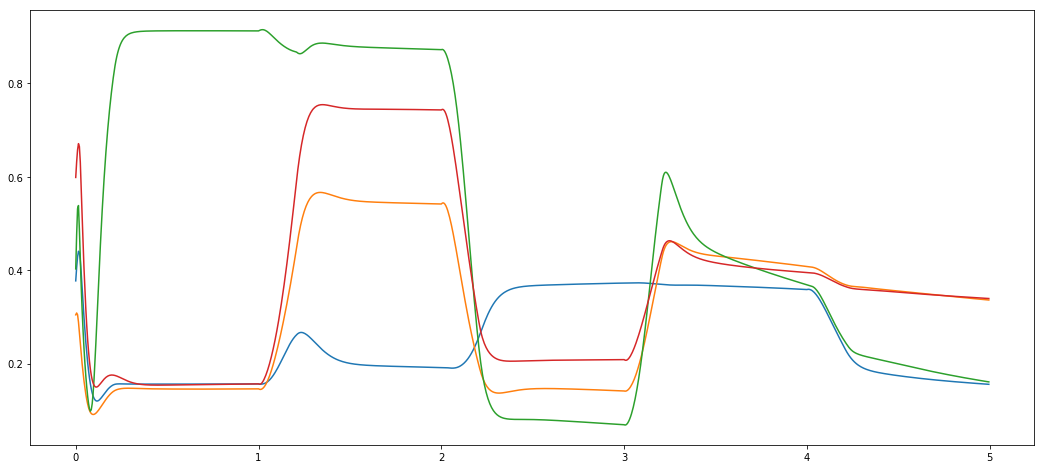

In [14]:
# Plot the highest unit activities
%matplotlib inline
n_top = 4  # how many units to plot
top_pop = np.array(S.e)  # population to visualize
top_units = ei_net.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = ei_net.all_activs[top_pop[top_units]].transpose()
plt.plot(ei_net.all_times, top_acts)
plt.show()

[120 197  72]


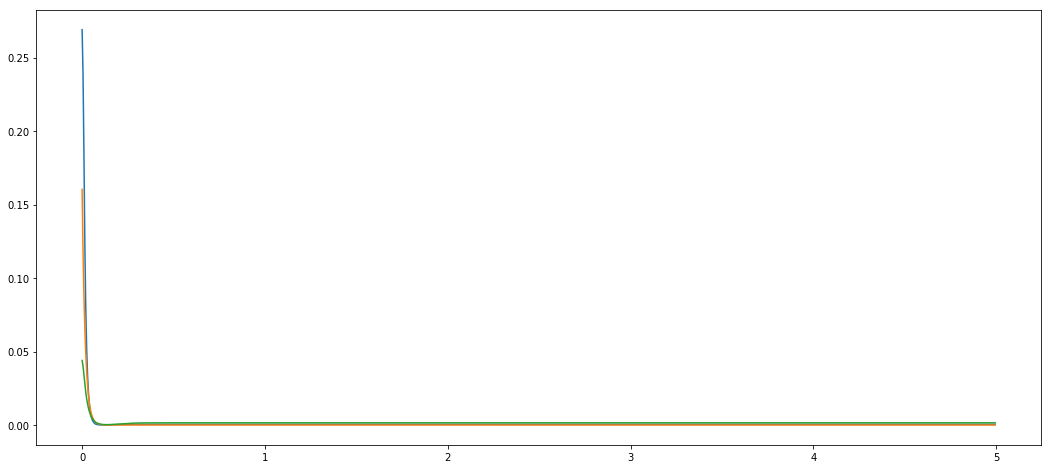

In [13]:
# Plot the lowest unit activities
n_bottom = 4  # how many units to plot
bottom_pop = np.array(M.e)  # population to visualize
bottom_units = ei_net.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = ei_net.all_activs[bottom_pop[bottom_units]].transpose()
plt.plot(ei_net.all_times, bottom_acts)
plt.show()

In [ ]:
ei_net.conn_anim(M.e, S.i, slider=True)

In [ ]:
ei_net.act_anim(S.e+M.e, 0.2)

In [ ]:
ei_net.hist_anim(S.e+M.e)

In [9]:
# logging
ei_net.log()